In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")
y = pd.read_csv(r"trainLabels.csv")

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [5]:
import seaborn as sns
sns.heatmap(train.corr(), linewidths = 0.1)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled = scaler.fit_transform(train)
pca = PCA()
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

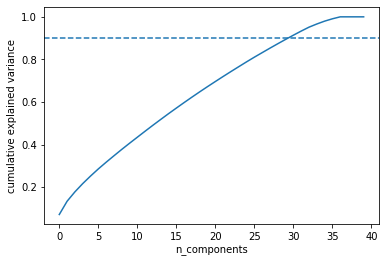

In [7]:
exp_variance = pca.explained_variance_ratio_
cum_exp_variance = np.cumsum(exp_variance)

import matplotlib.pyplot as plt
# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(range(pca.n_components_), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
ax.set_xlabel("n_components")
ax.set_ylabel("cumulative explained variance")

In [8]:
n_components = 12
pipeline = Pipeline([("n", Normalizer()), ("pca", PCA(n_components))])
pca_train = pipeline.fit_transform(train)
pca_test = pipeline.transform(test)

In [9]:
from sklearn.mixture import GaussianMixture

x_all = np.r_[pca_train, pca_test]
print('x_all shape :',x_all.shape)
 
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
best_gmm.fit(x_all)
gmm_train = best_gmm.predict_proba(pca_train)
gmm_test = best_gmm.predict_proba(pca_test)

x_all shape : (10000, 12)


In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(gmm_train, y.Label, test_size = 0.3, random_state = 10)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def report(model, test_X = test_X, test_y = test_y):
    pred = model.predict(test_X)
    acc = accuracy_score(test_y, pred)
    print(acc)

In [12]:
from sklearn.model_selection import GridSearchCV

In [21]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params = {"n_estimators" : [10, 50, 100, 200,400], "max_depth" : [3, 10, 20, 40]}
grid_search_rf = GridSearchCV(rf, params)
grid_search_rf.fit(train_X, train_y)
report(grid_search_rf.best_estimator_)

C:\Users\Manan Jhaveri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9233333333333333


In [22]:
grid_search_rf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
xgb = XGBClassifier()
params = {"eta": [0.01, 0.1, 1], "max_depth": [15, 20], "subsample": [0.5, 1], "gamma": [0.1, 1, 10]}
xgb_gs = GridSearchCV(xgb, params, cv = 3)
xgb_gs.fit(train_X, train_y)
report(xgb_gs.best_estimator_)

In [ ]:
xgb_gs.best_params_

In [13]:
final = XGBClassifier(eta =  0.01, gamma =  0.1, max_depth = 15, subsample =  0.5)

In [14]:
final.fit(gmm_train, y.Label)
report(final)

0.9966666666666667


In [15]:
result = final.predict(gmm_test)

In [16]:
df = pd.DataFrame({"Id": list(np.arange(1,9001, 1)), "Solution": result})
df.set_index("Id", inplace = True)

In [17]:
df.to_csv(r"submission.csv")